# Computer Homework 7: Simulating trajectories of charged particles in electric and magnetic fields

## "Preflight" (8/10 points)

#### Due at the beginning of class on Friday, Feb. 28 to receive the first 8/40 points on this assignment (you need to show you made a solid effort to work through the code, even if it is not fully functional - pseudo-code or comments describing what should go in there count).  The entire completed notebook is due by midnight on Wednesday March 11.  The next preflight of HW 8 will be posted on the evening of Tuesday March 10.

In this excercise we will simulate how particles move in electric and magnetic fields. The charged particles will move in response to a force, which causes an acceleration, which in turn changes the velocity and position.  The motion will depend on the initial position and velocity. 

### Import the usual libraries

In [5]:
import numpy as np                         # numpy is a library that includes most of the numerical function you will need
import matplotlib.pyplot as plt            # this is the library we use to plot   
from mpl_toolkits.mplot3d import Axes3D    # this is a library to plot in 3d

In the last class, you created functions to calculate the force due to an electric field on a charge q, and the force due to a magnetic field on a charge q moving at velocity v:

In [59]:
def calc_force_on_charge_by_efield(electric_field, q = 1.6e-19) :
    ''' We have one argument, and a key-word argument.  q has a DEFAULT value of the charge of the electron in C'''
    force = q*electric_field
    return force

def calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q = 1.6e-19) :
    ''' Fill out description of appropriate arguments and/or keyword arguments.  You will need to use np.cross
    from above. '''
    force = q*np.cross(charge_velocity, magnetic_field)
    return force

**Use both functions above in a new function**, acceleration_of_charge_in_ebfields, to calculate the acceleration on a charged particle in the presence of both an electric and magnetic field.  You may have done this in the "bonus" step of the last lab if you had extra time.

In [60]:
def calc_acceleration_of_charge_in_ebfields(electric_field, magnetic_field, charge_velocity, q, m) :
    force = q*(electric_field+ np.cross(charge_velocity, magnetic_field))
    return force/m


Note, the `calc_force_on_charge_by_?` functions above require a vector for the electric or magnetic field.  These, however, may vary depending on the charged particle's position.  For example, in the electric field due to a point charge, the field has a $1/r^2$ dependence.  

Below, we write example functions to return the electric and magnetic fields that are parallel to the x-axis.  In this simplified case, the electric and magnetic fields are independent of the charged particle position.  We will later write an example where this is *not* the case

In [61]:
# Functions to return e-field and b-field at a point.
#  Generalizes for non-constant e and b-fields --> Outputs the input to the calc_force_on_charge_by_????

def constant_electric_x_field(charge_position) :
    ''' This is a test where $\vec{E} = [1, 0, 0]$'''
    return np.array([1,0,0])

def constant_magnetic_x_field(charge_position) :
    ''' This is a test where $\vec{B} = [1, 0, 0]$'''
    return np.array([1,0,0])

Here, we test that the electric field is constant regardless of a charge's position, and also print the force due to that electric field.  This is a bit of a trivial test because the constant electric field is constant (independent of position) by construction.

In [62]:
def test_constant_electric_x_field() :
    ''' Note, we do not necessarily need arguments for a function to work! '''

    #  Choose two particle positions to compare
    charge_position_1 = np.array([0,0,0])
    charge_position_2 = np.array([0,0,1])

    #  Test if the electric field is indeed constant at both positions
    efield_at_pos1 = constant_electric_x_field(charge_position_1) 
    efield_at_pos2 = constant_electric_x_field(charge_position_2)

    #  Check force on an electron at each position
    print('Force due to constant electric field at position 1: ')
    print(calc_force_on_charge_by_efield(efield_at_pos1))
    
    print(' Is the e-field the same at both positions? If yes, no error message will appear.') 
    # This assert statement is the crux of the test.  If the boolean fails (False), the test will fail.
    np.testing.assert_array_equal(efield_at_pos1, efield_at_pos2)  


In [63]:
# Run the test!
test_constant_electric_x_field()

Force due to constant electric field at position 1: 
[1.6e-19 0.0e+00 0.0e+00]
 Is the e-field the same at both positions? If yes, no error message will appear.


In general, the electric and/or magnetic fields may depend on the position of the particle.

**Write your own function** in the cell below that returns a magnetic field that increases linearly with the z position of a charged particle,
\begin{eqnarray}
\vec{B} = B_0z\hat{z},
\end{eqnarray}
where $B_0=0.1$T/m (so $B_0z$ has units of T, as a magnetic field should).

In [64]:
def linearly_increasing_bfield(charge_position) :
    ''' Fill out your docstrings here'''
    B0 = .1
    z = charge_position[2]
    B = np.array([0,0,B0*z]) 
    return B

**Bonus**:  Write your own test_linearly_increasing_bfield function that asserts that the B field at [0,0,1] is smaller than the B field at [0,0,2].  Hint:  You could try using `np.testing.assert_array_less` (https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.testing.assert_array_less.html)

In [65]:
#  Bonus function here
def test_linearly_increasing_bfield() :
    '''Tests that B-field at [0,0,1] is smaller than the B field at [0,0,2]'''
    #  Your code here
        #  Choose two particle positions to compare
    charge_position_1 = np.array([0,0,1])
    charge_position_2 = np.array([0,0,2])

    #  Test if the electric field is indeed constant at both positions
    Bfield_at_pos1 = linearly_increasing_bfield(charge_position_1) 
    Bfield_at_pos2 = linearly_increasing_bfield(charge_position_2)


    print(' Is the b-field the same at both positions? If yes, no error message will appear.') 
    # This assert statement is the crux of the test.  If the boolean fails (False), the test will fail.
    z1 = Bfield_at_pos1[2]
    z2 = Bfield_at_pos2[2]
    
    np.testing.assert_array_less(z1, z2)  

In [66]:
test_linearly_increasing_bfield()

 Is the b-field the same at both positions? If yes, no error message will appear.


#### Analogous to your computer assignments on circuits, we have a change in position and a change in velocity, 
\begin{eqnarray}
\frac{d\vec{x}}{dt}&=&\vec{v}\\
\frac{d\vec{v}}{dt}&=&\vec{a}
\end{eqnarray}
So, if we were to use Euler's method to update the next ith step, is based on the i-1th step as:
\begin{eqnarray}
\vec{x}_i&=&\frac{d\vec{x}_{i-1}}{dt}\times dt\\
&=&\vec{v}_{i-1}\times dt\\
\vec{v}_i&=&\frac{d\vec{v}_{i-1}}{dt}\times dt\\
&=&\vec{a}_{i-1}\times dt
\end{eqnarray}

The vector $\vec{v}_{i-1}$ is the rate of change of $\vec{x}_{i-1}$ to get the updated $\vec{x}_i$.  Similarly, the vector $\vec{a}_{i-1}$ is the rate of change of $\vec{v}_{i-1}$ to get the updated $\vec{v}_i$.

**Write a function** called get_updated_value that takes in a current_value, rate_of_change and dt, and returns the updated value.  This should work for getting the updated position and the updated velocity.

In [67]:
def get_updated_value(current_value, rate_of_change, dt) :
    #  Your code here and below to return the updated value.  
    #    Start with your docstrings, enclosed in '''these three'''
    updated_value = current_value + rate_of_change * dt
    return updated_value

For Euler's method, the `rate_of_change` is simply the particle's **current velocity** and acceleration due to the electric and magnetic fields due to the particle's **current position and velocity**.  In class, we will discuss an alternative method to calculate the rate of change called the Runge-Kutta method.  

In [68]:
def get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    '''When using Euler's method, the rates of change are simply the particle_velocity, and the acceleration
    due to the electric and magnetic field at that particle_position.  While this does not depend on dt, 
    we will keep it as an argument for parallels with the Runge-Kutta method'''
    
    electric_field_at_position = electric_field_function(particle_position)
    magnetic_field_at_position = magnetic_field_function(particle_position)
    
    particle_acceleration = calc_acceleration_of_charge_in_ebfields(electric_field_at_position, magnetic_field_at_position, 
                                                                        particle_velocity, q, m)
    return particle_velocity, particle_acceleration

#### Now that you can get the position and the velocity for any given timestep, let's set up a trajectory calculation!

To calculate the trajectory, we will need 
- Initial conditions, 
- Empty position and perhaps velocity arrays to populate (we will want to return these)
- Timesteps at which we will calculate the trajectory segments
- A loop to iterate through to use Euler's method to calculate values at the next timestep.

**Our goals at the end of this pre-flight** is to have a reasonable `calc_trajectory_in_fields` function for a non-time evolving $\vec{E}$ and $\vec{B}$ field, and to test this with *just* an electric field parallel to the x-axis, and *just* a magnetic field parallel to the x-axis. 

First, **define your initial conditions** and reasonable timestepping to test the function.  For the test, let us say our initial position is at the origin, $\vec{x}_0=[0,0,0]$, and our test particle is going parallel to the y-axis, $\vec{v}_0=[0,1,0]$.  Let us also assume we iterate from $t=0$s to $t=50$s, with 10,000 timesteps.  You'll need to calculate the correpsonding $dt$ to **define your timesteps array**.

In [69]:
# Your code here:
initial_position = np.array([0,0,0])
initial_velocity = np.array([0,1,0])
dt = 50/10000
timesteps = np.arange(0,50,dt)



Now, **write a function** that outputs the place-holder arrays for either position_evolution and velocity_evolution.  These will be populated in each loop iteration, so we may as well fill them with zeros.  Note, you will want an x, y, z and a vx, vy, vz for each timestep in your timesteps array.  So, your shape of your position_evolution array will be the same as your velocity_evolution array.  
*Hint*:  See the array slicing section of the hw7_python_practice from the last class to see what this might look like.

In [70]:
#  Your code here:
def create_place_holder_array(timesteps) :
    ''' Returns a placeholder array '''
    position_arr = np.zeros([timesteps.size,3])
 
    return position_arr   
    #  Your code here


We now have all of the ingredients for our trajectory calculation.  

Assuming you did all of the above steps, the following `calc_trajectory_in_fields` should work.  You'll notice that there are **functions as arguments**!  This allows you to have more generalized code to calculate the trajectory in fields.  One of the input arguments that is a function is get_updated_value_function.  For now, we will use `get_updated_value_euler`.  There is a more accurate way to update values, which we will discuss in class

In [104]:
def calc_trajectory_in_fields(electric_field_function, magnetic_field_function, get_rate_of_change_function, 
                              timesteps, particle_position, particle_velocity, q = 1, m=1) :
    '''This function takes in functions that output the electric (and magnetic) fields functions with an argument of particle
    position.  This also requires as an argument the timesteps you wish to iterate over, and the 
    initial conditions, of the particle_position and particle_velocity it starts out with.  The charge and mass are optional
    (key word arguments).'''
    
    # Create place holder arrays
    position_evolution = create_place_holder_array(timesteps)
    velocity_evolution = create_place_holder_array(timesteps)
    
    dt = timesteps[1]  # timesteps looks like np.array([0, dt, 2*dt, 3*dt, ...., (total_timesteps-1)*dt])
    for inum, timestep in enumerate(timesteps) :
        # Populate
        position_evolution[inum,:] = particle_position
        velocity_evolution[inum,:] = particle_velocity
        
        # Calculate velocity and acceleration due to e- and b-fields to update particle_position and particle_velocity
        position_rate_of_change, velocity_rate_of_change = get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
        
        # Update
        particle_position = get_updated_value(particle_position, position_rate_of_change, dt)
        particle_velocity = get_updated_value(particle_velocity, velocity_rate_of_change, dt)
        
    return position_evolution, velocity_evolution
        

**Check the output** of your `calc_trajectory_in_fields` for an electron in the constant electric field and constant magnetic field functions from before, the timesteps you've defined, and your get_updated_value_euler function as the function to update your position and velocity. 

In [72]:
# Check output here
position_evolution, velocity_evolution = calc_trajectory_in_fields(constant_electric_x_field, constant_magnetic_x_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1) 


**Plot your output** in the cell below.  

Text(0.5, 0, 'Time (s)')

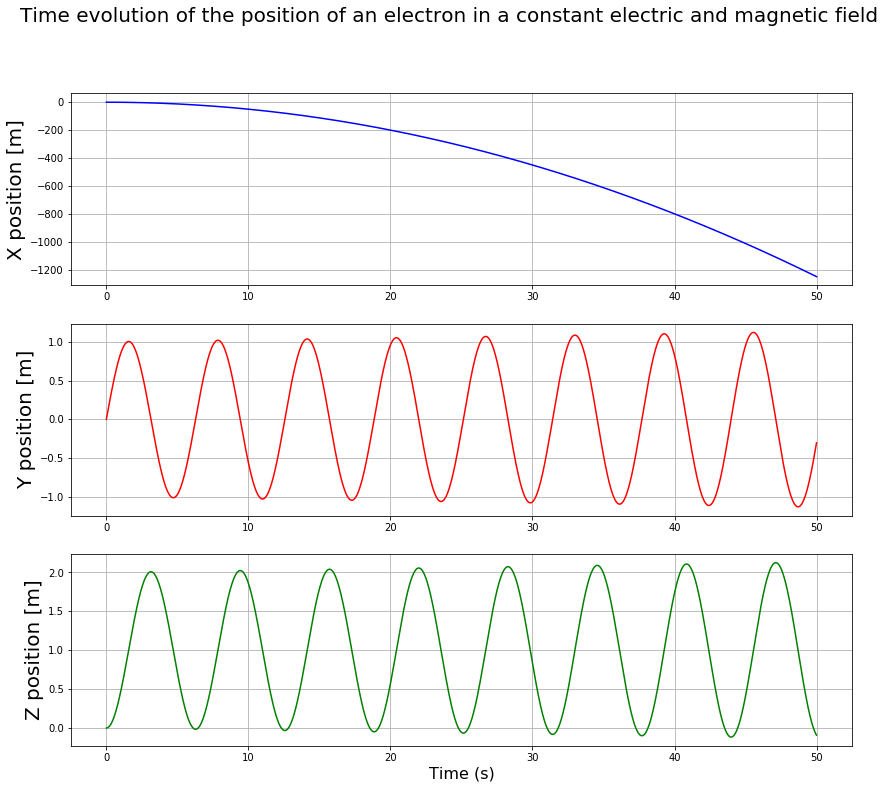

In [73]:
#  Plot the position evolution 
# Plot the evolution of x position
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,12))

x_pos = position_evolution[:,0]
y_pos = position_evolution[:,1]
z_pos = position_evolution[:,2]

fig.suptitle('Time evolution of the position of an electron in a constant electric and magnetic field', fontsize=20)

for ax, ylabel, yvalue, col, in zip ([ax1,ax2, ax3], ['X position [m]','Y position [m]', 'Z position [m]'], [x_pos, y_pos, z_pos], ['b', 'r', 'g']):
    ax.plot(timesteps, yvalue, color=col)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=20)

ax3.set_xlabel('Time (s)', fontsize=16)

Text(0.05, 0.95, "Time Evolution of Electron's Position in Constant Electric and Magnetic Field")

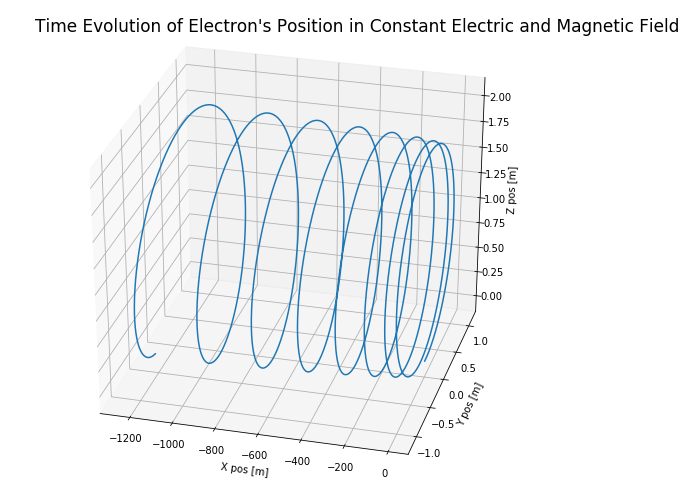

In [74]:
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(position_evolution[:,0], position_evolution[:,1], position_evolution[:,2])
ax.set_xlabel('X pos [m]')
ax.set_ylabel('Y pos [m]')
ax.set_zlabel('Z pos [m]')
ax.text2D(0.05, 0.95, "Time Evolution of Electron's Position in Constant Electric and Magnetic Field", transform = ax.transAxes, fontsize = 17)

Text(0.05, 0.95, "Time Evolution of Electron's Velocity in Constant Electric and Magnetic Field")

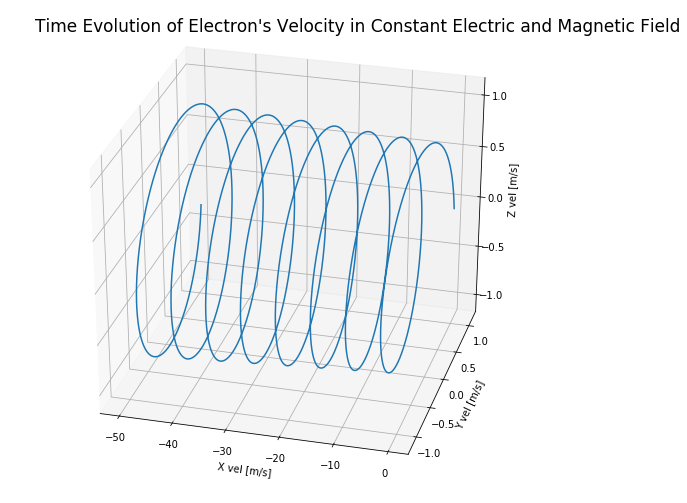

In [75]:
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(velocity_evolution[:,0], velocity_evolution[:,1], velocity_evolution[:,2])
ax.set_xlabel('X vel [m/s]')
ax.set_ylabel('Y vel [m/s]')
ax.set_zlabel('Z vel [m/s]')
ax.text2D(0.05, 0.95, "Time Evolution of Electron's Velocity in Constant Electric and Magnetic Field", transform = ax.transAxes, fontsize = 17)

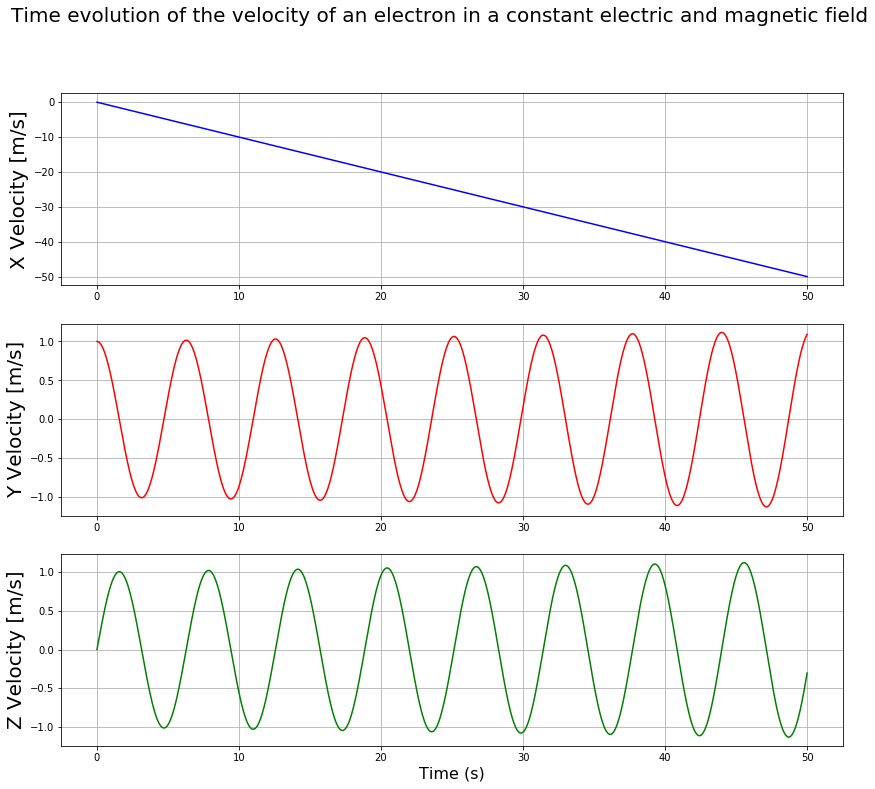

In [76]:
#  Plot the velocity evolution 
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,12))

x_vel = velocity_evolution[:,0]
y_vel = velocity_evolution[:,1]
z_vel = velocity_evolution[:,2]

fig.suptitle('Time evolution of the velocity of an electron in a constant electric and magnetic field', fontsize=20)

for ax, ylabel, yvalue, col, in zip ([ax1,ax2, ax3], ['X Velocity [m/s]','Y Velocity [m/s]', 'Z Velocity [m/s]'], [x_vel, y_vel, z_vel], ['b', 'r', 'g']):
    ax.plot(timesteps, yvalue, color=col)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=20)

ax3.set_xlabel('Time (s)', fontsize=16)
plt.show()


**This is where your "pre-flight" ends.**  Note, your pre-flight completion is simply a check that you made a solid effort to start the assignment, but not everything needs to be debugged.  You will receive 10 out of the 40 points for making a *solid effort* to get some code working (or skeleton code that makes sense).   We will spend the first 10 minutes of the next in-class lab making sure folks have the above "fill in code" pieces working.  

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Below is the official "assignment", but you will need to get the above working before you can run and continue in-flight.

**Class time on Friday 2/28**: 
- 10-15 minutes: Go through the pre-flight
- 5 minutes: Write `constant_magnetic_y_field` for part 2
- 5 minutes: `Execute calc_trajectory_in_fields` with appropriate arguments for part 2
- 10 minutes:  Discuss the Runge-Kutta method.
- 15 minutes:  Continue working in class with peers and instructors as help

## Example 1: Particle in a parallel E and B field

The pre-flight set-up simulates the trajectory of an electron in an electric and magnetic field that happen to be parallel.  Note, that the initial velocity (in the y-direction) is perpendicular to the fields.  You will need to generate additional plots to answer the discussion questions below.  

## Part 1 (8/40 points)  discussion questions with supporting plots:

### Fill out your descriptions in this markdown cell, and your code with plots in cells below.

#### (1) Describe the trajectory of the electron you saw from the pre-flight and explain the behavior (e.g. if you see circular and/or translational motion, why?).

The electron showcased both translational and uniform circular motion. It had translational motion in the positive direction and moved in a circle in the y-z plane. This resulting in a helical spriral of constant radius. This makes sense because both the B field and the E field act in the x direction, so the transaltional motion is attributed to the electric field while the circular motion is caused by the electric field and the initial velocity in the y direction. 

#### (2) Plot the kinetic energy of the particle as a function of time.  Note, you can calculate this from the returned output velocity_evolution. Describe and explain the behavior of the kinetic energy as a function of time.

As illustrated, the velocity in the x direction increases in what seems to be a parabolic fashion if we look at the shadow of the 3D plot on the xy plane. The y and z velocities seem to be sinusoidal, which makes sense since the electron is undergoing circular motion in that plane.  The amplitude of the sine waves increase as the particle moves on. 

#### (3) Create a new function, `constant_doubled_electric_x_field` with electric field being $\vec{E}=[2,0,0]$, and use this to overplot the trajectory with the first trajectory.  Describe what happens when you double the strength of the E-field.

With the constant doubled electric field the particle goes twice as far in the x direction as it does initially. This makes sense as the electric field is responsible for motion in the x direction. The radius of the circle in the yz plane remains unchanged though. d

#### (4) Create a new function, `constant_doubled_magnetic_x_field` with magnetic field being $\vec{B}=[2,0,0]$, and use this to overplot on the previous trajectories.  Describe what happens when you double the strength of the B-field.

With the doubled magnetic field the particle moves in a circle with half the radius of the original trajectory, but covers the same amount of distance in the x direction. 

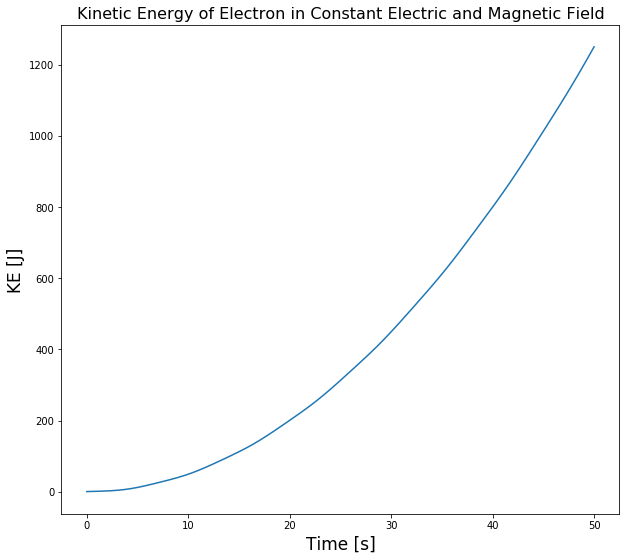

In [77]:
#  Plot kinetic energy here
#  Plot kinetic energy here
mass_electron = 1
kinetic_energy_evolution = (velocity_evolution[:,0]**2 + velocity_evolution[:,1] + velocity_evolution[:,2])*0.5*mass_electron 

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
plt.plot(timesteps, kinetic_energy_evolution)
plt.xlabel('Time [s]', fontsize = 17)
plt.ylabel('KE [J]', fontsize = 17)
plt.title("Kinetic Energy of Electron in Constant Electric and Magnetic Field", fontsize = 16)
plt.show()

In [78]:
def constant_doubled_electric_x_field(particle_position) :
    # Your code including docstrings here
    electric_field = 2*np.array([1,0,0])
    return electric_field

In [79]:
position_evolution_2, velocity_evolution_2 = calc_trajectory_in_fields(constant_doubled_electric_x_field, constant_magnetic_x_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1) 


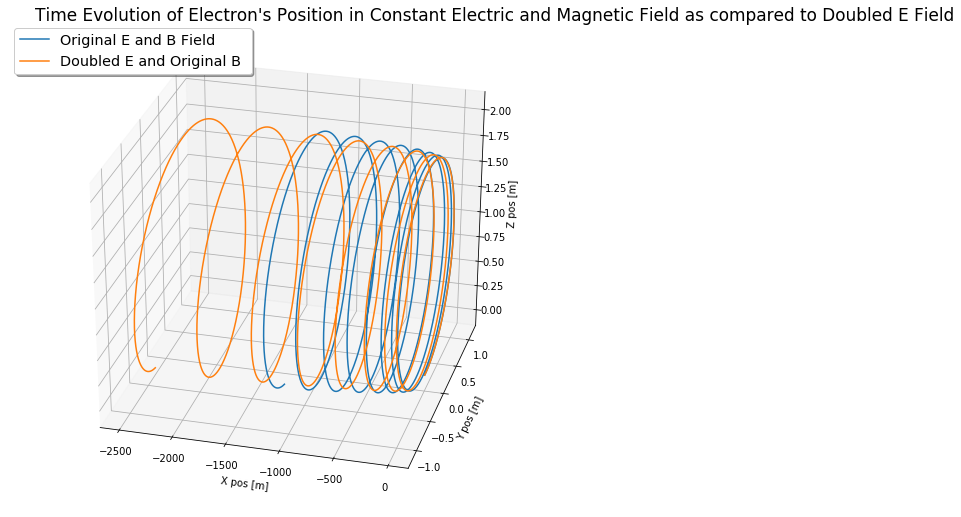

In [80]:
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(position_evolution[:,0], position_evolution[:,1], position_evolution[:,2], label = 'Original E and B Field')
ax.plot(position_evolution_2[:,0], position_evolution_2[:,1], position_evolution_2[:,2], label = 'Doubled E and Original B ')
ax.set_xlabel('X pos [m]')
ax.set_ylabel('Y pos [m]')
ax.set_zlabel('Z pos [m]')
ax.text2D(0.05, 1.00, "Time Evolution of Electron's Position in Constant Electric and Magnetic Field as compared to Doubled E Field", transform = ax.transAxes, fontsize = 17)
legend = ax.legend(loc = 'upper left', shadow = True, fontsize = 'x-large')



In [81]:
def constant_doubled_magnetic_x_field(particle_position) :
    magnetic_field = 2*np.array([1,0,0])
    return magnetic_field

In [82]:
position_evolution_3, velocity_evolution_3 = calc_trajectory_in_fields(constant_electric_x_field, constant_doubled_magnetic_x_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1) 

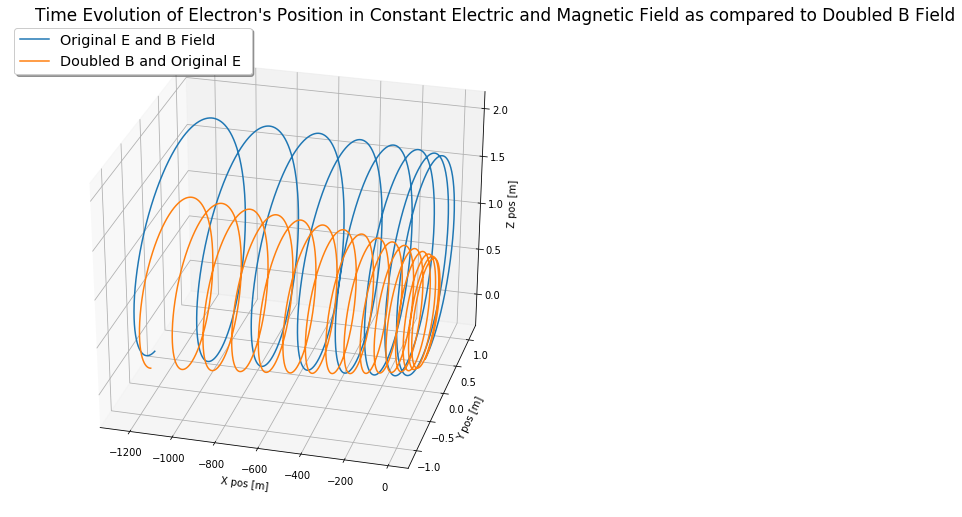

In [83]:
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(position_evolution[:,0], position_evolution[:,1], position_evolution[:,2], label = 'Original E and B Field' )
ax.plot(position_evolution_3[:,0], position_evolution_3[:,1], position_evolution_3[:,2], label = 'Doubled B and Original E ')
ax.set_xlabel('X pos [m]')
ax.set_ylabel('Y pos [m]')
ax.set_zlabel('Z pos [m]')
ax.text2D(0.05, 1.00, "Time Evolution of Electron's Position in Constant Electric and Magnetic Field as compared to Doubled B Field", transform = ax.transAxes, fontsize = 17)
legend = ax.legend(loc = 'upper left', shadow = True, fontsize = 'x-large')

In [84]:
position_evolution_4, velocity_evolution_4 = calc_trajectory_in_fields(constant_doubled_electric_x_field, constant_doubled_magnetic_x_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1)

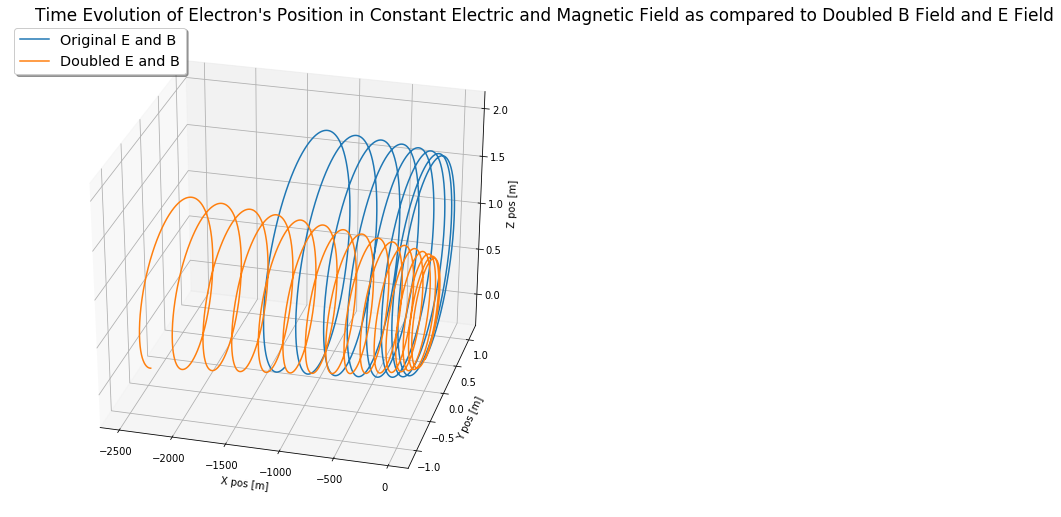

In [85]:
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(position_evolution[:,0], position_evolution[:,1], position_evolution[:,2], label = "Original E and B")
ax.plot(position_evolution_4[:,0], position_evolution_4[:,1], position_evolution_4[:,2], label = "Doubled E and B")
ax.set_xlabel('X pos [m]')
ax.set_ylabel('Y pos [m]')
ax.set_zlabel('Z pos [m]')
ax.text2D(0.05, 1.00, "Time Evolution of Electron's Position in Constant Electric and Magnetic Field as compared to Doubled B Field and E Field", transform = ax.transAxes, fontsize = 17)
legend = ax.legend(loc = 'upper left', shadow = True, fontsize = 'x-large')

In [86]:
# Plot the trajectories (hint: need a 3-d plot -- refer to the hw7_python_practice if you need a reminder)
#  You should overplot the original trajectory, the trajectory with a doubled electric field only,
#   and the trajectory with a doubled magnetic field only to isolate the effects.
#    Additional hint:  You'll need to execute the function `calc_trajectory_in_fields` three separate times for 
#      the different E and B field set ups that you are comparing.


## Example 2: Particle in a crossed E and B field

This simulation simulates the trajectory of an electron in an electric and magnetic field that happen to be perpendicular, with $\vec{E}=[1,0,0]$ and $\vec{B}=[0,1,0]$.  
- You will need to **write** a new (but very similar) function `constant_magnetic_y_field`.  
- The particle starts from rest, the **initial conditions for particle_velocity** will also differ from Example 1.  
- **Execute the function calc_particle_trajectory_in_field** with the appropriate arguments (including newly defined functions) to get the position_evolution and the velocity_evolution in this E and B field set-up.  These will allow you to generate the graphs needed for the discussion questions below.

## Part 2 (8/40 points)  discussion questions:

### Fill out your descriptions in this markdown cell, and your code with plots in cells below.

#### (1) Explain why the trajectory looks the way it does.
The trajectory looks parabolic because the E field and B fields are perpendicular. The E field accelerates the electron in the x direction and then the magnetic force which is velocity dependant becomes bigger and bigger and pushes it back, forming a repeating parabolic trajectory as the cycle repeats itself. 

#### (2) Explain why the kinetic energy look the way it does.
The kinteic energy looks distinctly sinusoidal. This is because the electron is osciallating back and forth between two position and experiencing a change in direciton periodically corresponding to the points where the kinetic energy is 0 because the velocity is 0. 

#### (3) Describe what happens when you double the strength of the E-field.  
When you double the strength of the E field the electron moves farther in the x direction (exactly twice as far) before reaching its vertex and moving back. This is exactly as we would expect because the E field is responsible for pushing the eleectron in the x direction so a bigger force will send the electron farther out. 

#### (4) Describe what happens when you double the strength of the B-field.  You'll need a new function for this as well.

When you double the strength of the B field the electron seems to only make half as far in the x direction. This makes sense as the magnetic force will increase by a factor of 2 and push the particle back faster, meaning it will travel less in the x direction.  


In [87]:
def constant_magnetic_y_field(particle_position) :
    "'the magnetic field is now perpendicular to the e field'"
    magnetic_field = np.array([0,1,0])
    return magnetic_field


In [88]:
def constant_doubled_magnetic_y_field(particle_position) :
    "'the magnetic field is now doubled and perpendicular to the e field'"
    magnetic_field = 2*np.array([0,1,0])
    return magnetic_field

In [89]:
# Define your initial conditions (i.e. particle_position and particle_velocity here)
initial_position = np.array([1,-1,0])
initial_velocity = np.array([0,0,0])
dt = 50/10000
timesteps = np.arange(0,50,dt)



In [90]:
# Calculate your trajectories here (e.g. with `calc_trajectory_in_fields`)
position_evolution, velocity_evolution = calc_trajectory_in_fields(constant_electric_x_field, constant_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1)
position_evolution_2, velocity_evolution_2 = calc_trajectory_in_fields(constant_electric_x_field, constant_doubled_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1)
position_evolution_3, velocity_evolution_3 = calc_trajectory_in_fields(constant_doubled_electric_x_field, constant_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position, initial_velocity, q = -1, m=1)


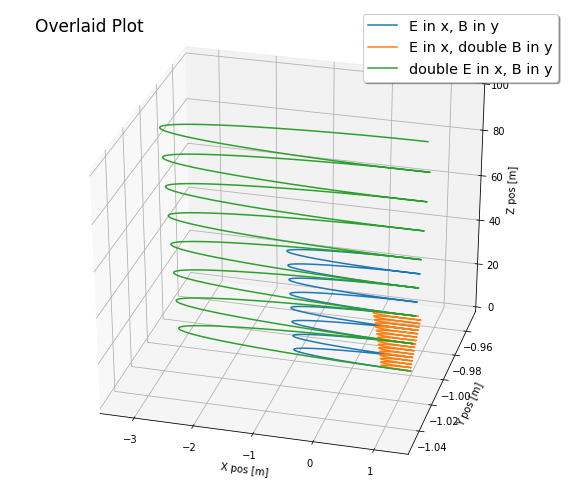

In [91]:
# Plot your trajectory here, overplotting the three in a 3-d plot
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)
ax.plot(position_evolution[:,0], position_evolution[:,1], position_evolution[:,2], label = 'E in x, B in y')
ax.plot(position_evolution_2[:,0], position_evolution_2[:,1], position_evolution_2[:,2], label= 'E in x, double B in y')
ax.plot(position_evolution_3[:,0], position_evolution_3[:,1], position_evolution_3[:,2], label= 'double E in x, B in y')
ax.set_xlabel('X pos [m]')
ax.set_ylabel('Y pos [m]')
ax.set_zlabel('Z pos [m]')
ax.text2D(0.05, 0.95, "Overlaid Plot", transform = ax.transAxes, fontsize = 17)
egend = ax.legend(loc = 'upper right', shadow=True, fontsize='x-large')
plt.show()

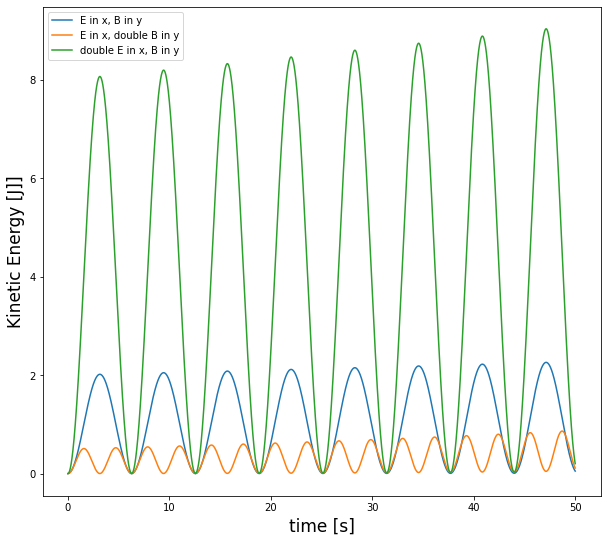

In [92]:
# Plot your kinetic energy of the electron here in all three cases
mass_electron = 1
kinetic_energy_evolution = (velocity_evolution[:,0]**2 + velocity_evolution[:,1]**2 + velocity_evolution[:,2]**2)*0.5*mass_electron 
kinetic_energy_evolution_1 = (velocity_evolution_2[:,0]**2 + velocity_evolution_2[:,1]**2 + velocity_evolution_2[:,2]**2)*0.5*mass_electron
kinetic_energy_evolution_2 = (velocity_evolution_3[:,0]**2 + velocity_evolution_3[:,1]**2 + velocity_evolution_3[:,2]**2)*0.5*mass_electron 

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here

plt.plot(timesteps, kinetic_energy_evolution, label = 'E in x, B in y')
plt.plot(timesteps, kinetic_energy_evolution_1, label = 'E in x, double B in y')
plt.plot(timesteps, kinetic_energy_evolution_2, label = 'double E in x, B in y')
plt.xlabel('time [s]', fontsize = 17)
plt.ylabel('Kinetic Energy [J]]', fontsize = 17)

plt.legend()
plt.show()

## Part 3 (8/40 points): The velocity filter
   

Consider a particle with charge 1 C and mass 1 kg moving with velocity $v = (1~\mathrm{m/s})~\hat x$.  If this particle enters a region with a magnetic field $B = (1~\mathrm{T})~\hat y$, then clearly it will experience a force.   You can calculate it by hand quite easily.    You could then create an electric field to perfectly oppose this magnetic force.   If you set up this field configuration you would have a "velocity filter." 

#### (1) Calculate, by hand, the magnitude of the E field you need to oppose the B field described above, and create the appropriate function:
`velocity_filtering_electric_field`. 


#### (2) Calculate the trajectory using your function `calc_trajectory_in_fields`.  Show that your calculation from (1) was correct.

#### (3) Overplot the trajectory of particles with a velocity twice as fast and half as fast as what you found above.  Discuss why the trajectories look as they do.



(1) Write your equations here.

\begin{equation}
qE = qvB \\
E = vB
\end{equation}



In [93]:
def velocity_filtering_electric_field(particle_position) :
    ''' Note, you still do not need to use particle_position here. This function finds the electric field to perfectly oppose the B field'''
    # Your code here
    v = 1
    B = 1 
    electric_field = v*B*np.array([0,0,-1]) 
    return electric_field

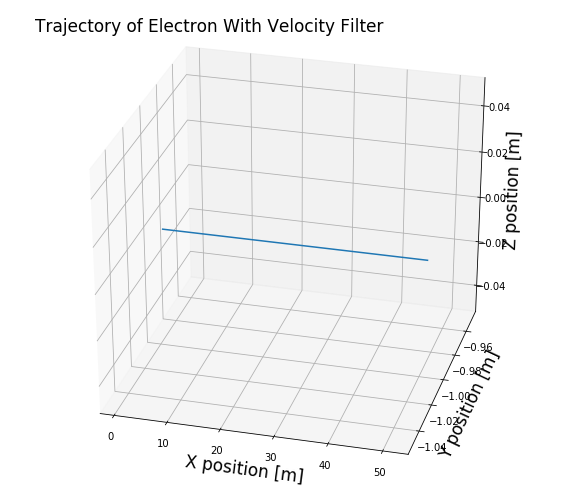

In [94]:
# Plot your trajectory here
# Plot your trajectory here
# Define initial Conditions
initial_velocity_3 = np.array([1,0,0])
initial_position_3 = np.array([1,-1,0])

# Calculate the trajectory
position_velocity_filter, velocity_filter = calc_trajectory_in_fields(velocity_filtering_electric_field, constant_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position_3, initial_velocity_3, q = -1, m=1)
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)

ax.plot(position_velocity_filter[:,0], position_velocity_filter[:,1], position_velocity_filter[:,2])
ax.set_xlabel('X position [m]', fontsize = 17)
ax.set_ylabel('Y position [m]', fontsize = 17)
ax.set_zlabel('Z position [m]', fontsize = 17)
ax.text2D(0.05, 0.95, "Trajectory of Electron With Velocity Filter", transform=ax.transAxes, fontsize = 17)
plt.show()

*Discuss* why the above plot shows that your calculation was correct.

The above plot shows that my calculation was correct because as expected the particle moves in a straight line since the magnetic force and electric forces are balanced. 

In [95]:
# Define the other two initial particle velocities here (twice as fast and half as fast)
initial_velocity_2Times = initial_velocity_3*2
initial_velocity_half = initial_velocity_3*0.5
initial_position_3 = np.array([1,-1,0])

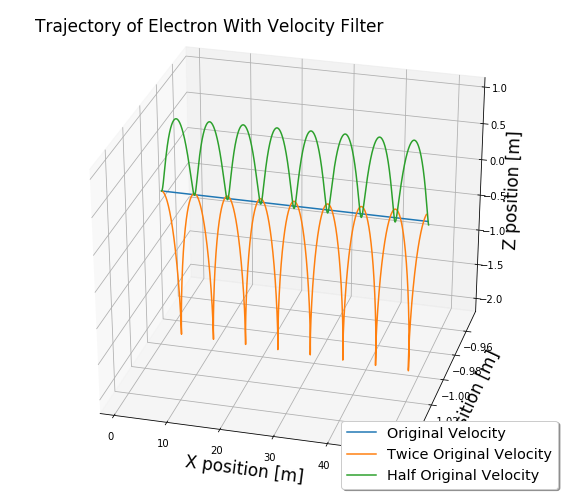

In [96]:
# Plot all three trajectories here
# Define the other two initial particle velocities here (twice as fast and half as fast)
# Plot your trajectory here
# Define initial Conditions

# Calculate the trajectory
position_velocity_filter_2Times, velocity_filter_2Times = calc_trajectory_in_fields(velocity_filtering_electric_field, constant_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position_3, initial_velocity_2Times, q = -1, m=1)
position_velocity_filter_half, velocity_filter_half = calc_trajectory_in_fields(velocity_filtering_electric_field, constant_magnetic_y_field, get_rates_of_change_euler, 
                              timesteps, initial_position_3, initial_velocity_half, q = -1, m=1)

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)

ax.plot(position_velocity_filter[:,0], position_velocity_filter[:,1], position_velocity_filter[:,2], label = 'Original Velocity')
ax.plot(position_velocity_filter_2Times[:,0], position_velocity_filter_2Times[:,1], position_velocity_filter_2Times[:,2], label = 'Twice Original Velocity')
ax.plot(position_velocity_filter_half[:,0], position_velocity_filter_half[:,1], position_velocity_filter_half[:,2], label = 'Half Original Velocity')

ax.set_xlabel('X position [m]', fontsize = 17)
ax.set_ylabel('Y position [m]', fontsize = 17)
ax.set_zlabel('Z position [m]', fontsize = 17)
ax.text2D(0.05, 0.95, "Trajectory of Electron With Velocity Filter", transform=ax.transAxes, fontsize = 17)
legend = ax.legend(loc = 'lower right', shadow=True, fontsize='x-large')

plt.show()

**Discussion** here.

If we use a velocity that is twice the velocity necessary for equilibrium, then the magnetic force which has a velocity dependance will become bigger. If the magnetic force becomes bigger there will be more motion in the zy plane since there is a constant magnetic y field. As we can see this is the behviour exhibited by the graph of twice the original velocity. As for half the original velocity That means the magnetic force, there is still repeated parabolic motion but to a lesser degree (smaller amplitude) since the magnetic force has gone down. 

## Part 4 (8/40 points): Motion in non-uniform magnetic field
For this problem the magnetic field will not be uniform, instead it is going to be changing as a function of position.  The magnetic field in cylindrical coordinates is:
\begin{equation}
 B(r,\phi,z) = - \frac {B_0} {2} r \hat{r} + (B_0z+B_1)\hat{z}
\end{equation}

That is the the magnitude of the field is changing in $z$ and $r$, but is not changing in $\phi$.  You should make $B_1$ about 10 times as big as $B_1$, that is if $B_1$ is 1 T then $B_1$ should be 0.1 T/m, as in the example during the pre-flight.

Take the electric field to be zero.

In case you are curious... yes, this is a field that obeys Maxwell's equations. Such a field could not really fill all space... it blows up as $r\rightarrow\infty$. However, this field could exist inside a long, cylindrical coil of wire (a solenoid) where the number of turns per meter is increasing linearly. Such fields are sometimes used at particle accelerators to guide beams of charged particles.

### 1) Rewrite the B-field in cartesian coordinates.
**Write your cartesian equation here**
\begin{eqnarray}
\\
\\
x &=& - \frac {B_0} {2} rcos(\phi) = \frac {B_0}{2}x\\
y &=& - \frac {B_0} {2} rsin(\phi) = \frac {B_0}{2}y\\
z &=& (B_0z+B_1)\\
B(x,y,z) &=& - \frac {B_0} {2} rcos(\phi)\hat{x} + - \frac {B_0} {2} rsin(\phi)\hat{y} + (B_0z+B_1)\hat{z}
\end{eqnarray}

### 2) Calculate the trajectory for a particle moving in this field.  You will need to now write a function 
`solenoid_magnetic_field` 
### where the returned magnetic field *does* depend on the particle_position that was input as an argument.  

### 3) Explore the effects of changing the integration method with the Runge-Kutta method discussed in class. Mainly, compare how the kinetic energy changes with time when using Euler's method to calculate the position and velocity evolution, and how the kinetic energy changes with the Runge-Kutta method.

The kinetic energy in the case of Euler's method is on the order of magnitude of joules. For the Range Kutta method it is on the order of magnitude of 10 to the negative fifth. Also, the kinetic energy of the electorn in the Runge Kutta trial is asymptotic, but it isn't as steep as the graph made with the ueler method. For example at around 40 seconds there is a steep jump in the euler graph, but the ascent in the Runge Kutta graph is much more gradual.


In [97]:
# Your new function here
def solenoid_magnetic_field(particle_position) :
    ''' Calculate a changing magnetic field that depends on the particles position. '''
    x = particle_position[0];
    y = particle_position[1];
    z = particle_position[2];
    
    B_1 = 1
    B_0 = B_1 / 10
    
    B_x = (-B_0/2)*(x)
    B_y = (-B_0/2)*(y)
    B_z = B_0*z+B_1
       
    B = np.array([B_x, B_y, B_z])
    return B

In [98]:
def zero_electric_field(particle_position):
    '''Create a electric field of zero at all positions'''
    return np.array([0,0,0])

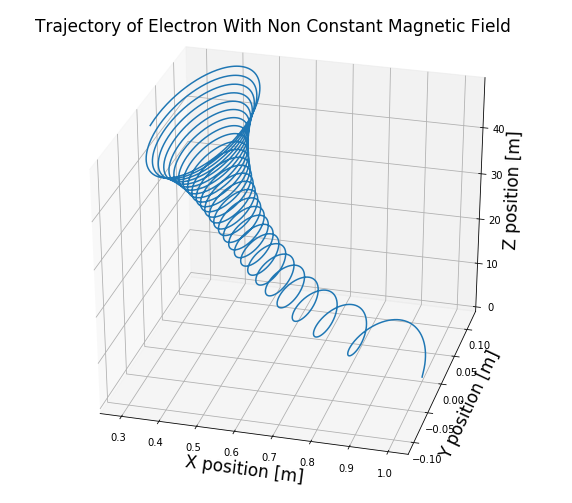

In [99]:
#  Plot trajectory of your particle here using the Euler method
initial_position_4 = np.array([1,0,0])
initial_velocity_4 = np.array([0,0,1])

#  Plot trajectory of your particle here using the Euler method
position_NonConstant, velocity_NonConstant = calc_trajectory_in_fields(zero_electric_field, 
                                                                       solenoid_magnetic_field, 
                                                                       get_rates_of_change_euler, 
                                                                       timesteps, initial_position_4, initial_velocity_4, q=-1, m=1)

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)

ax.plot(position_NonConstant[:,0], position_NonConstant[:,1], position_NonConstant[:,2])
ax.set_xlabel('X position [m]', fontsize = 17)
ax.set_ylabel('Y position [m]', fontsize = 17)
ax.set_zlabel('Z position [m]', fontsize = 17)
ax.text2D(0.05, 0.95, "Trajectory of Electron With Non Constant Magnetic Field", transform=ax.transAxes, fontsize = 17)

plt.show()

<Figure size 720x648 with 0 Axes>

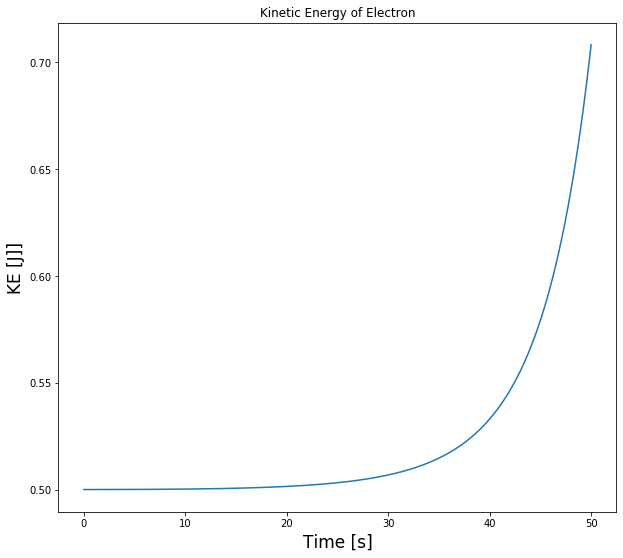

In [100]:
#  Plot the kinetic energy of your particle here using the velocities updated with the Euler method.

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here

KE_nc = (velocity_NonConstant[:,0]**2 + velocity_NonConstant[:,1]**2 + velocity_NonConstant[:,2]**2)*0.5*mass_electron

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
plt.plot(timesteps, KE_nc)
plt.xlabel('Time [s]', fontsize = 17)
plt.ylabel('KE [J]]', fontsize = 17)
plt.title("Kinetic Energy of Electron")
plt.show()




## Runge-Kutta method:  Discuss in class
Below is a function that does the next-best-thing to the Euler method.  This is the Runge-Kutta method, that essentially uses values in between sampled points to get a better updated value.  You may remember approximating integrals (area under a curve) with right and left sum, then using the mid-point, then finally using the trapezoid method.  That is essentially what we are doing here: https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/a/riemann-sums-review

The Runge-Kutta method does the following:

- Use the acceleration due to the fields at the current position to figure out a $\vec{v}_{i+1/2}=\vec{v}_{i}+\Delta\vec{v}_{i+1/2}$, or the change in velocity over half a time-step (e.g. between timestep $i$ and timestep $i+1$).

- Use the updated velocity (over the half a time-step) to find the new particle position in half a time-step, $\vec{x}_{i+1/2}\vec{x}_i+\Delta\vec{x}_{i+1/2}$.  

- Use the electric and magnetic fields at $\vec{x}_{i+1/2}$ for a particle with velocity $\vec{v}_{i+1/2}$ to calculate the half time-step acceleration, $\vec{a}_{i+1/2}$ that will be used to actually update the velocity for $\vec{v}_{i+1}$.  We also use the half time-step velocity $\vec{v}_{i+1/2}$ to update the position for $\vec{x}_{i+1}$.

In [101]:
def get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    ''' This uses the Runge-Kutta method to calculate the updated value.  This method relies on mid-points.
    Note, this method can replace get_rates_of_change_euler in the argument, get_rates_of_change_function, that
    is input to calc_trajectory_in_fields'''

    current_velocity, current_acceleration = get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
    
    mid_particle_velocity = current_velocity + current_acceleration * dt/2
    mid_particle_position = particle_position + mid_particle_velocity * dt/2
    
    # Calculate the acceleration due to the electric and magnetic fields at the mid_particle_position
    runge_kutta_velocity, runge_kutta_acceleration = get_rates_of_change_euler(mid_particle_position, mid_particle_velocity,
                                                                        electric_field_function,
                                                                        magnetic_field_function, q, m, dt)
    return runge_kutta_velocity, runge_kutta_acceleration

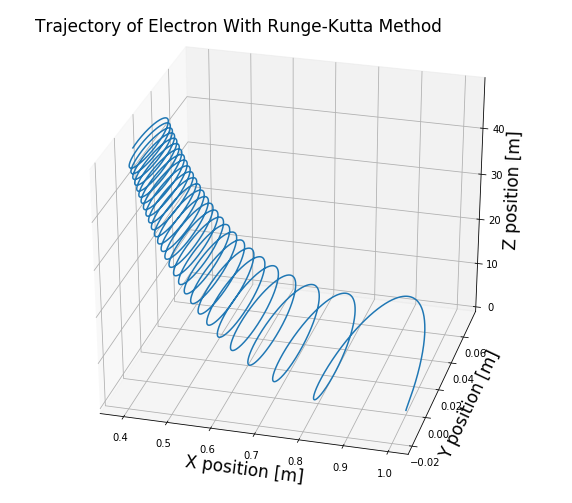

In [105]:
#  Plot trajectory of your particle here using the Runge-Kutta method
x_0 = np.array([1,0,0])
v_0 = np.array([0,0,1])
position_Runge, velocity_Runge = calc_trajectory_in_fields(zero_electric_field, solenoid_magnetic_field, get_rates_of_change_runge_kutta, timesteps, x_0, v_0, q = -1, m=1)

#  Plot the kinetic energy of your particle here using the velocities updated with the Euler method.
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')
ax.view_init(30,-75)

ax.plot(position_Runge[:,0], position_Runge[:,1], position_Runge[:,2])
ax.set_xlabel('X position [m]', fontsize = 17)
ax.set_ylabel('Y position [m]', fontsize = 17)
ax.set_zlabel('Z position [m]', fontsize = 17)
ax.text2D(0.05, 0.95, "Trajectory of Electron With Runge-Kutta Method", transform=ax.transAxes, fontsize = 17)

plt.show()

<Figure size 720x648 with 0 Axes>

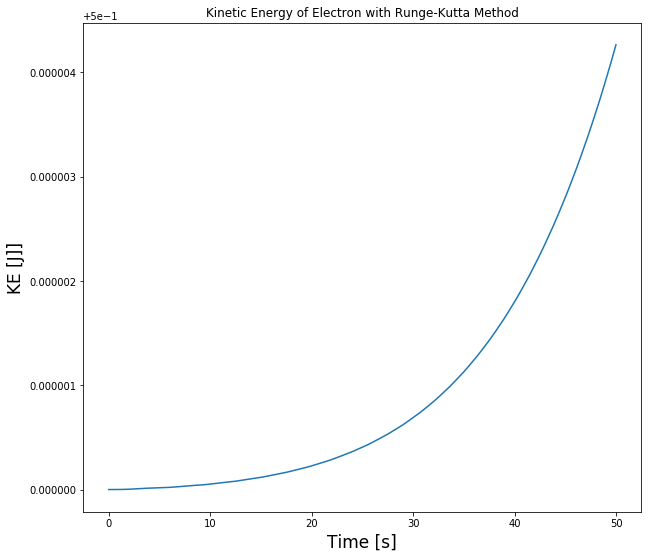

In [106]:
#  Plot the kinetic energy of the particle using the velocities updated using the Runge-Kutta method.
#  Plot the kinetic energy of the particle using the velocities updated using the Runge-Kutta method.
fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here

KE_rk = (velocity_Runge[:,0]**2 + velocity_Runge[:,1]**2 + velocity_Runge[:,2]**2)*0.5*mass_electron

fig = plt.figure(figsize=(10,9)) # you can specify figsize as a kwarg here
plt.plot(timesteps, KE_rk)
plt.xlabel('Time [s]', fontsize = 17)
plt.ylabel('KE [J]]', fontsize = 17)
plt.title("Kinetic Energy of Electron with Runge-Kutta Method")
plt.show()

SyntaxError: unexpected character after line continuation character (<ipython-input-8-03dd566cd157>, line 1)